<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW5Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.2973 - loss: 1.8776 - val_accuracy: 0.4608 - val_loss: 1.4835
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.5061 - loss: 1.3648 - val_accuracy: 0.5362 - val_loss: 1.2968
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.5664 - loss: 1.2180 - val_accuracy: 0.5698 - val_loss: 1.1994
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6050 - loss: 1.1220 - val_accuracy: 0.6031 - val_loss: 1.1056
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6317 - loss: 1.0409 - val_accuracy: 0.6090 - val_loss: 1.1201
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 100ms/step - accuracy: 0.6528 - loss: 0.9834 - val_accuracy: 0.6258 - val_loss: 1.0531
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.6751 - loss: 0.9272 - val_accuracy: 0.6477 - val_loss: 0.9931
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.6878 - loss: 0.882

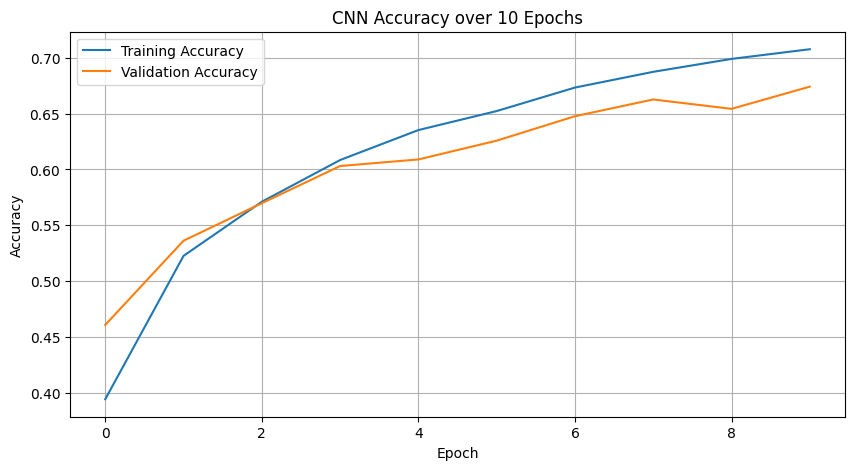

In [1]:
#Homework 5 Question 1

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test, y_test_cat))

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy over 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
